## Assignment: Advanced Regression

Importing the required libraries

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# model building packages
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [216]:
house_price = pd.read_csv('train.csv')

In [217]:
house_price.shape

(1460, 81)

In [218]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [219]:
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm  \
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     2Story            7            5       2003  \
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace  \
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0       196.0        Gd        TA      PConc       Gd       TA           No  \
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          GLQ         706          Unf           0        150          856  \
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        Ex          Y      SBrkr       856       854             0  \
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0       1710             1             0         2         1             3  \
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu   
0             1          Gd             8        Typ           0         NaN  \
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [220]:
house_price.describe([0.25,0.50,0.75,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual   
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  \
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  \
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF   
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  \
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath   
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  \
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  \
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
99%       1.000000      5.000000      2.000000     11.000000     2.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF   
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000  \
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   

In [221]:
# Based on the data dictionary provided, the presence of nulls in these columns suggests the absence of a facility,
# which could potentially impact the price.
# Therefore, we will first impute the categorical variables with 'none'

null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    house_price[i].fillna("none", inplace=True)

In [222]:
# Percentage of nulls
100 * round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending=False).head(18)

LotFrontage     18.0
GarageYrBlt      6.0
MasVnrArea       1.0
Id               0.0
KitchenAbvGr     0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
BedroomAbvGr     0.0
GarageCars       0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
dtype: float64

In [223]:
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/
                                                                 len(house_price.index),2).values>0.10]

LotFrontage    0.18
dtype: float64

In [224]:
house_price = house_price.drop(['LotFrontage'],axis='columns')

In [225]:
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/
                                                                 len(house_price.index),2).values>0.00]

MasVnrArea     0.01
GarageYrBlt    0.06
dtype: float64

In [226]:
house_price['Built_Age'] = house_price.YearBuilt.max()-house_price.YearBuilt
house_price['RemodAdd_Age'] = house_price.YearRemodAdd.max()-house_price.YearRemodAdd
house_price['GarageBlt_Age'] = house_price.GarageYrBlt.max()-house_price.GarageYrBlt
house_price['Sold_Age'] = house_price.YrSold.max()-house_price.YrSold
house_price[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','Built_Age','RemodAdd_Age',
             'GarageBlt_Age','Sold_Age']].sample(10)

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  Built_Age  RemodAdd_Age   
626        1960          1978       1960.0    2007         50            32  \
1090       1950          1950       1987.0    2009         60            60   
74         1915          1950       1915.0    2010         95            60   
1112       1957          1957       1957.0    2006         53            53   
1031       1920          1970       1970.0    2009         90            40   
1114       1954          2000       1955.0    2006         56            10   
1398       1950          1982       1950.0    2009         60            28   
911        1977          1989       1978.0    2009         33            21   
967        1955          1955       1955.0    2008         55            55   
246        1910          1950       1910.0    2006        100            60   

      GarageBlt_Age  Sold_Age  
626            50.0         3  
1090           23.0         1  
74             95.0         0  
1112           53.0         4  
1031           40.0         1  
1114           55.0         4  
1398           60.0         1  
911            32.0         1  
967            55.0         2  
246           100.0         4

In [227]:
house_price = house_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

### EDA

In [228]:
numeric_data = house_price.select_dtypes(include=['float64', 'int64'])
numeric_data.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1   
0   1          60     8450            7            5       196.0         706  \
1   2          20     9600            6            8         0.0         978   
2   3          60    11250            7            5       162.0         486   
3   4          70     9550            7            5         0.0         216   
4   5          60    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF   
0           0        150          856       856       854             0  \
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0       1710             1             0         2         1             3  \
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF   
0             1             8           0           2         548           0  \
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal   
0           61              0          0            0         0        0  \
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  SalePrice  Built_Age  RemodAdd_Age  GarageBlt_Age  Sold_Age  
0       2     208500          7             7            7.0         2  
1       5     181500         34            34           34.0         3  
2       9     223500          9             8            9.0         2  
3       2     140000         95            40           12.0         4  
4      12     250000         10            10           10.0         2

In [229]:
numeric_data = numeric_data.drop(['Id'], axis=1)
numeric_data.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1   
0          60     8450            7            5       196.0         706  \
1          20     9600            6            8         0.0         978   
2          60    11250            7            5       162.0         486   
3          70     9550            7            5         0.0         216   
4          60    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF   
0           0        150          856       856       854             0  \
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0       1710             1             0         2         1             3  \
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF   
0             1             8           0           2         548           0  \
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal   
0           61              0          0            0         0        0  \
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  SalePrice  Built_Age  RemodAdd_Age  GarageBlt_Age  Sold_Age  
0       2     208500          7             7            7.0         2  
1       5     181500         34            34           34.0         3  
2       9     223500          9             8            9.0         2  
3       2     140000         95            40           12.0         4  
4      12     250000         10            10           10.0         2

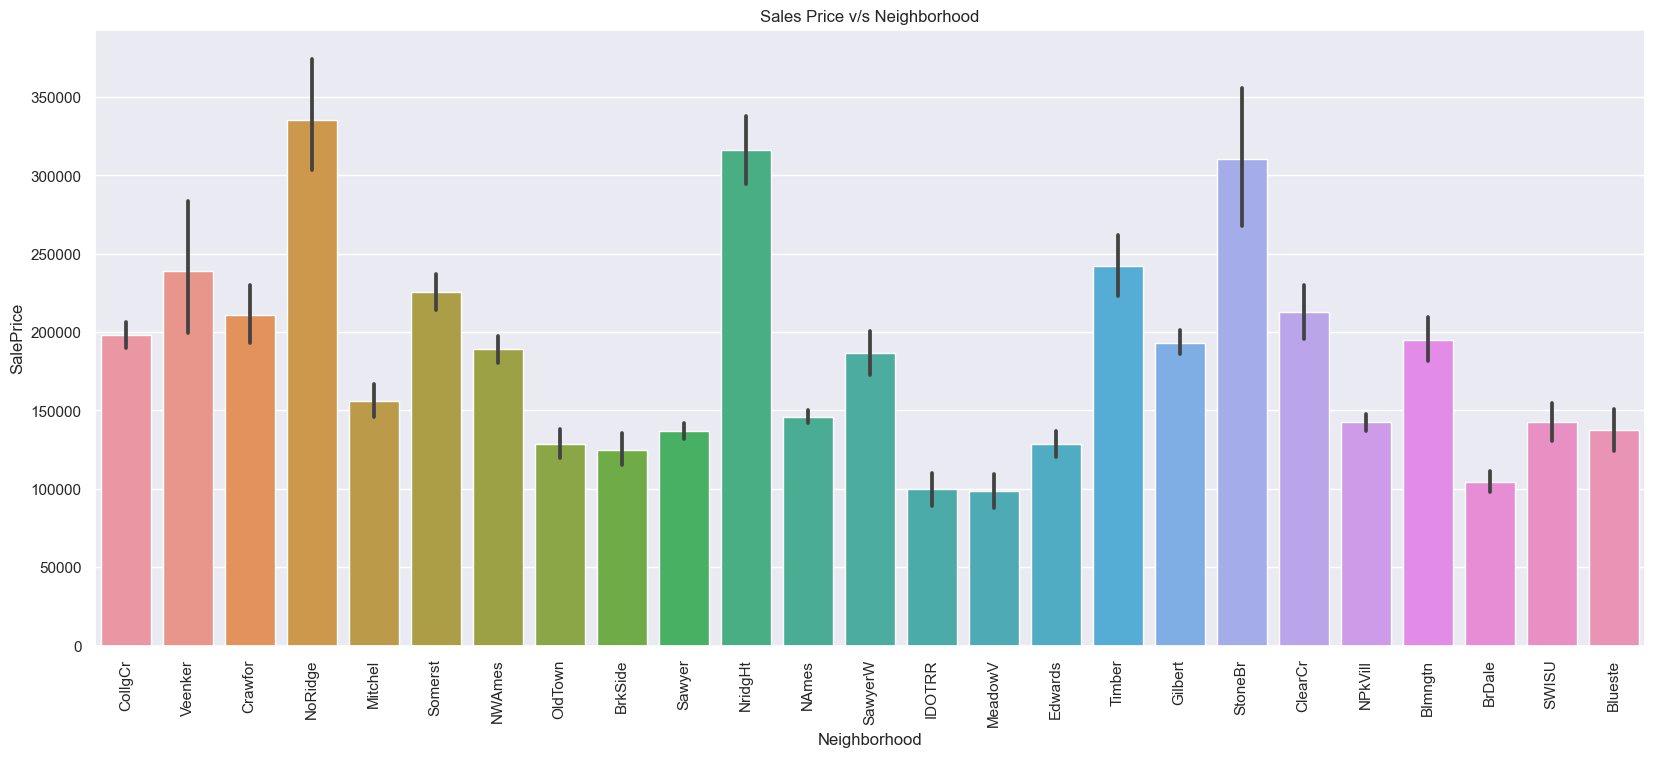

In [230]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= house_price)
plt.title("Sales Price v/s Neighborhood")
plt.xticks(rotation=90)
plt.show()

Properties are expensive in certain neighborhood

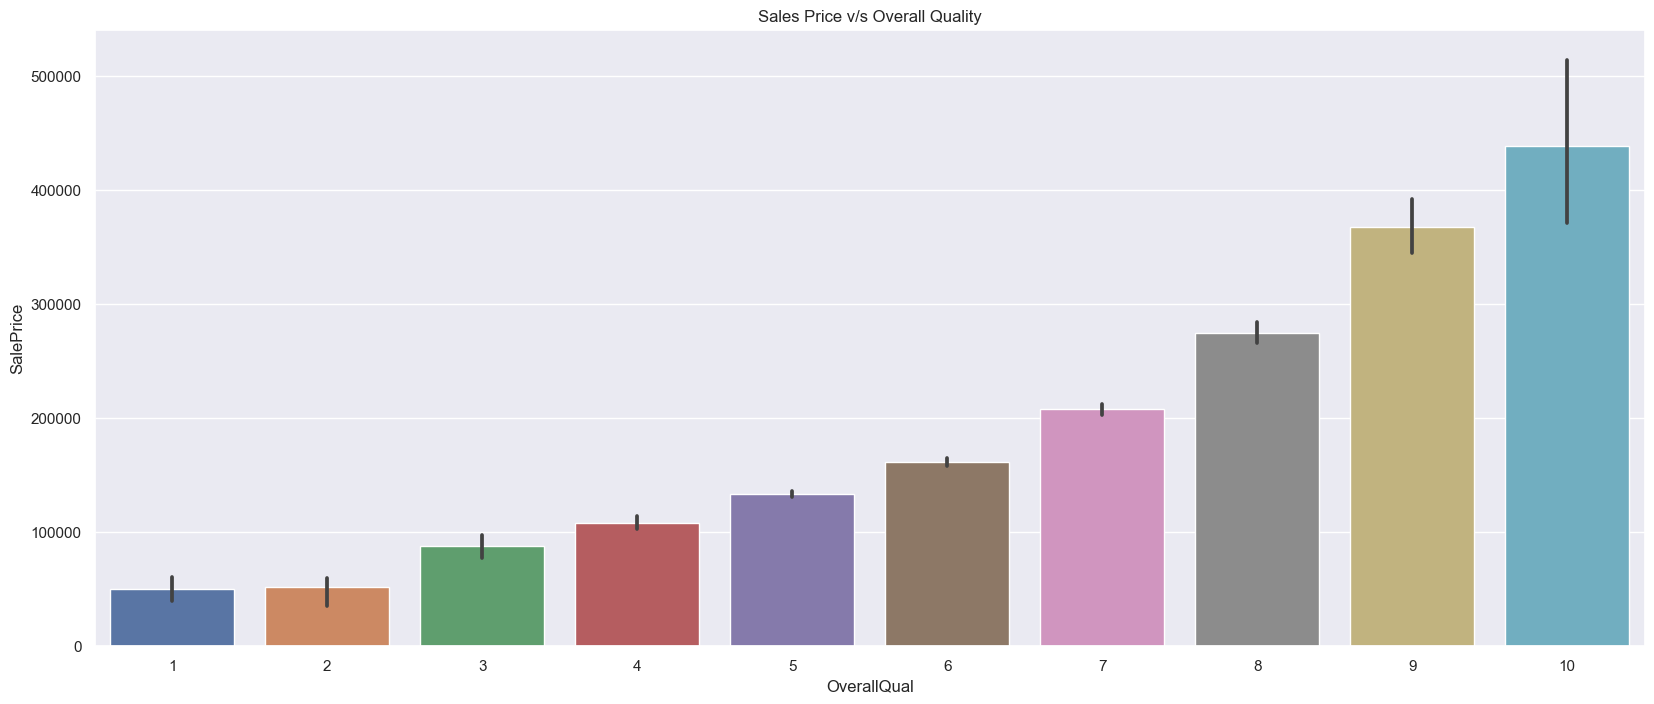

In [231]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= house_price)
plt.title("Sales Price v/s Overall Quality")
plt.show()

Quality has direct impact on the sale price

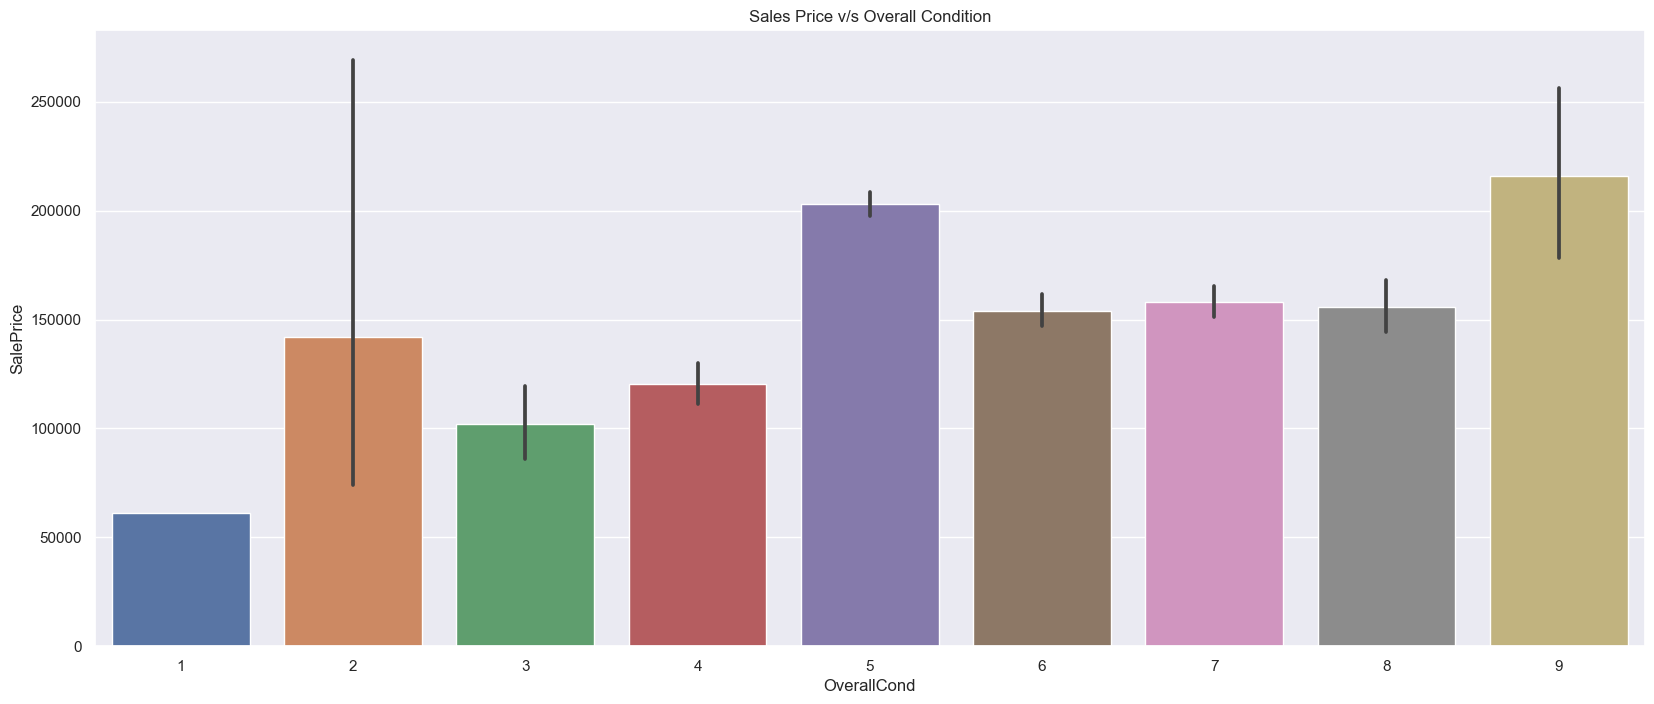

In [232]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= house_price)
plt.title("Sales Price v/s Overall Condition")
plt.show()

There is no direct relationship of Sale Price with overall condition

In [233]:
corr = numeric_data.corr()
corr

MSSubClass   LotArea  OverallQual  OverallCond  MasVnrArea   
MSSubClass       1.000000 -0.139781     0.032628    -0.059316    0.022936  \
LotArea         -0.139781  1.000000     0.105806    -0.005636    0.104160   
OverallQual      0.032628  0.105806     1.000000    -0.091932    0.411876   
OverallCond     -0.059316 -0.005636    -0.091932     1.000000   -0.128101   
MasVnrArea       0.022936  0.104160     0.411876    -0.128101    1.000000   
BsmtFinSF1      -0.069836  0.214103     0.239666    -0.046231    0.264736   
BsmtFinSF2      -0.065649  0.111170    -0.059119     0.040229   -0.072319   
BsmtUnfSF       -0.140759 -0.002618     0.308159    -0.136841    0.114442   
TotalBsmtSF     -0.238518  0.260833     0.537808    -0.171098    0.363936   
1stFlrSF        -0.251758  0.299475     0.476224    -0.144203    0.344501   
2ndFlrSF         0.307886  0.050986     0.295493     0.028942    0.174561   
LowQualFinSF     0.046474  0.004779    -0.030429     0.025494   -0.069071   
GrLivArea        0.074853  0.263116     0.593007    -0.079686    0.390857   
BsmtFullBath     0.003491  0.158155     0.111098    -0.054942    0.085310   
BsmtHalfBath    -0.002333  0.048046    -0.040150     0.117821    0.026673   
FullBath         0.131608  0.126031     0.550600    -0.194149    0.276833   
HalfBath         0.177354  0.014259     0.273458    -0.060769    0.201444   
BedroomAbvGr    -0.023438  0.119690     0.101676     0.012980    0.102821   
KitchenAbvGr     0.281721 -0.017784    -0.183882    -0.087001   -0.037610   
TotRmsAbvGrd     0.040380  0.190015     0.427452    -0.057583    0.280682   
Fireplaces      -0.045569  0.271364     0.396765    -0.023820    0.249070   
GarageCars      -0.040110  0.154871     0.600671    -0.185758    0.364204   
GarageArea      -0.098672  0.180403     0.562022    -0.151521    0.373066   
WoodDeckSF      -0.012579  0.171698     0.238923    -0.003334    0.159718   
OpenPorchSF     -0.006100  0.084774     0.308819    -0.032589    0.125703   
EnclosedPorch   -0.012037 -0.018340    -0.113937     0.070356   -0.110204   
3SsnPorch       -0.043825  0.020423     0.030371     0.025504    0.018796   
ScreenPorch     -0.026030  0.043160     0.064886     0.054811    0.061466   
PoolArea         0.008283  0.077672     0.065166    -0.001985    0.011723   
MiscVal         -0.007683  0.038068    -0.031406     0.068777   -0.029815   
MoSold          -0.013585  0.001205     0.070815    -0.003511   -0.005965   
SalePrice       -0.084284  0.263843     0.790982    -0.077856    0.477493   
Built_Age       -0.027850 -0.014228    -0.572323     0.375983   -0.315707   
RemodAdd_Age    -0.040581 -0.013788    -0.550684    -0.073741   -0.179618   
GarageBlt_Age   -0.085072  0.024947    -0.547766     0.324297   -0.252691   
Sold_Age         0.021407  0.014261     0.027347    -0.043950    0.008201   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF   
MSSubClass      -0.069836   -0.065649  -0.140759    -0.238518 -0.251758  \
LotArea          0.214103    0.111170  -0.002618     0.260833  0.299475   
OverallQual      0.239666   -0.059119   0.308159     0.537808  0.476224   
OverallCond     -0.046231    0.040229  -0.136841    -0.171098 -0.144203   
MasVnrArea       0.264736   -0.072319   0.114442     0.363936  0.344501   
BsmtFinSF1       1.000000   -0.050117  -0.495251     0.522396  0.445863   
BsmtFinSF2      -0.050117    1.000000  -0.209294     0.104810  0.097117   
BsmtUnfSF       -0.495251   -0.209294   1.000000     0.415360  0.317987   
TotalBsmtSF      0.522396    0.104810   0.415360     1.000000  0.819530   
1stFlrSF         0.445863    0.097117   0.317987     0.819530  1.000000   
2ndFlrSF        -0.137079   -0.099260   0.004469    -0.174512 -0.202646   
LowQualFinSF    -0.064503    0.014807   0.028167    -0.033245 -0.014241   
GrLivArea        0.208171   -0.009640   0.240257     0.454868  0.566024   
BsmtFullBath     0.649212    0.158678  -0.422900     0.307351  0.244671   
BsmtHalfBath     0.067418    0.070948  -

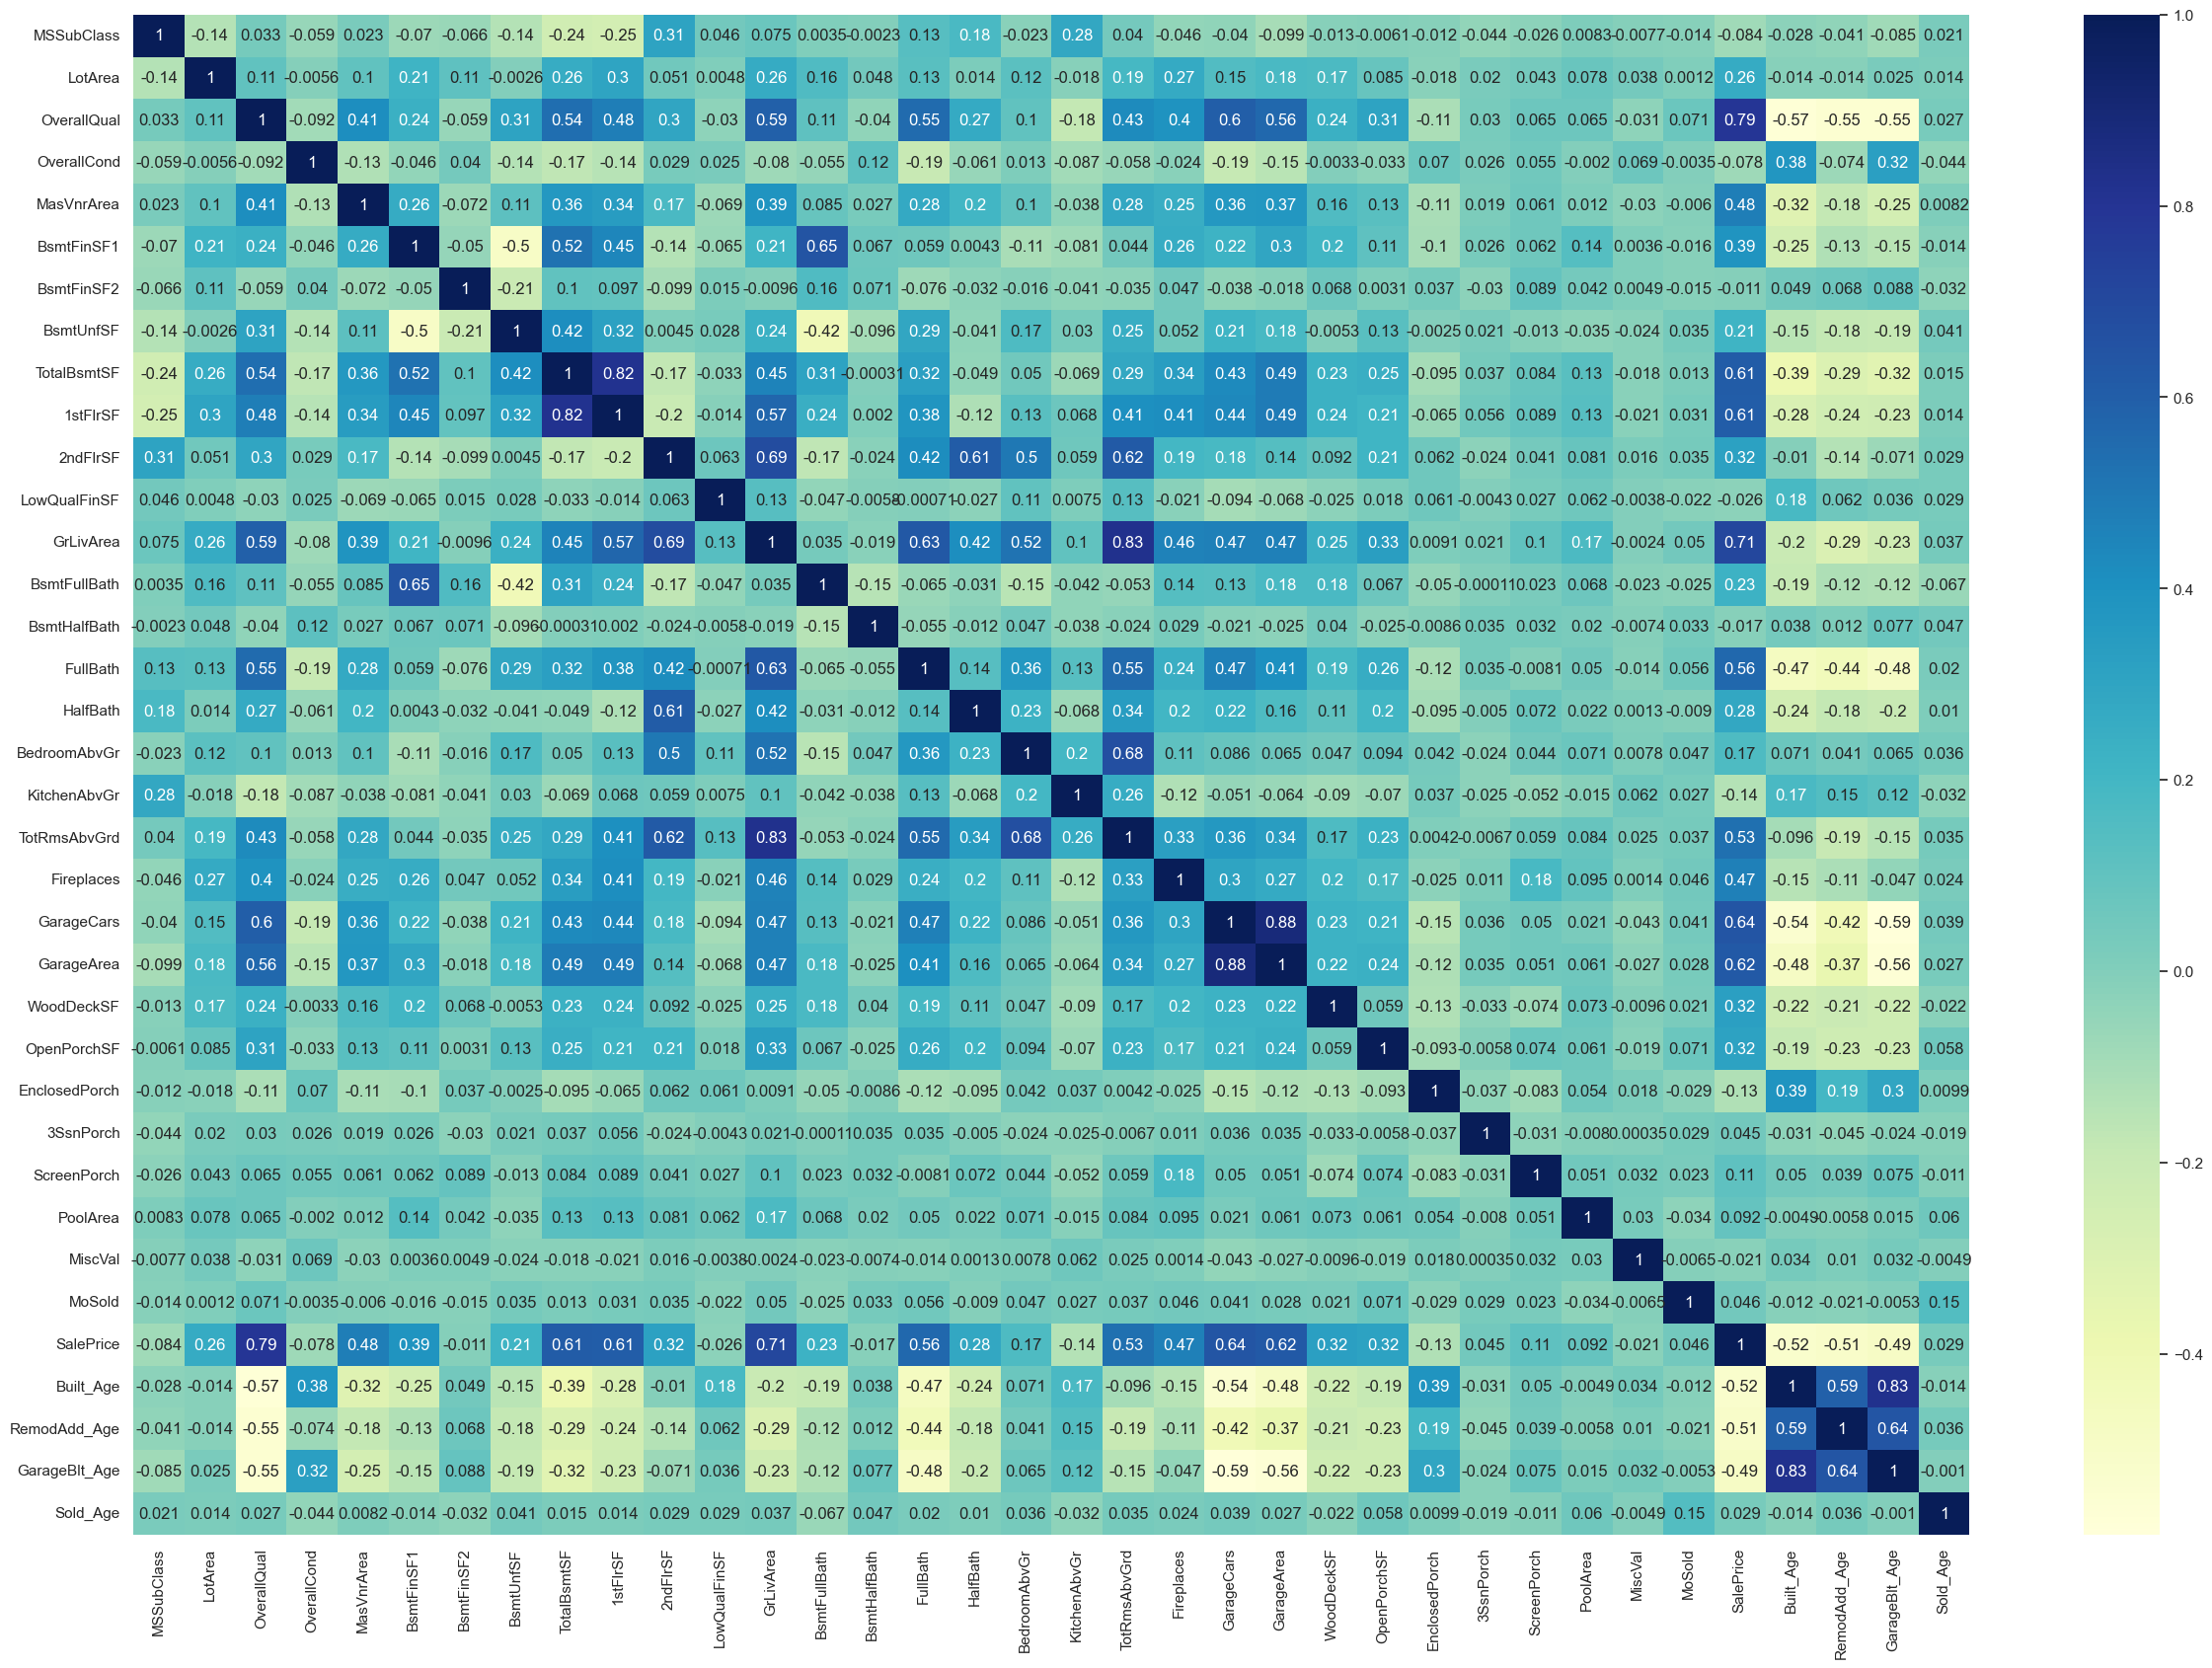

In [234]:
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

We see that there is correlation present. Let's analyse this further.

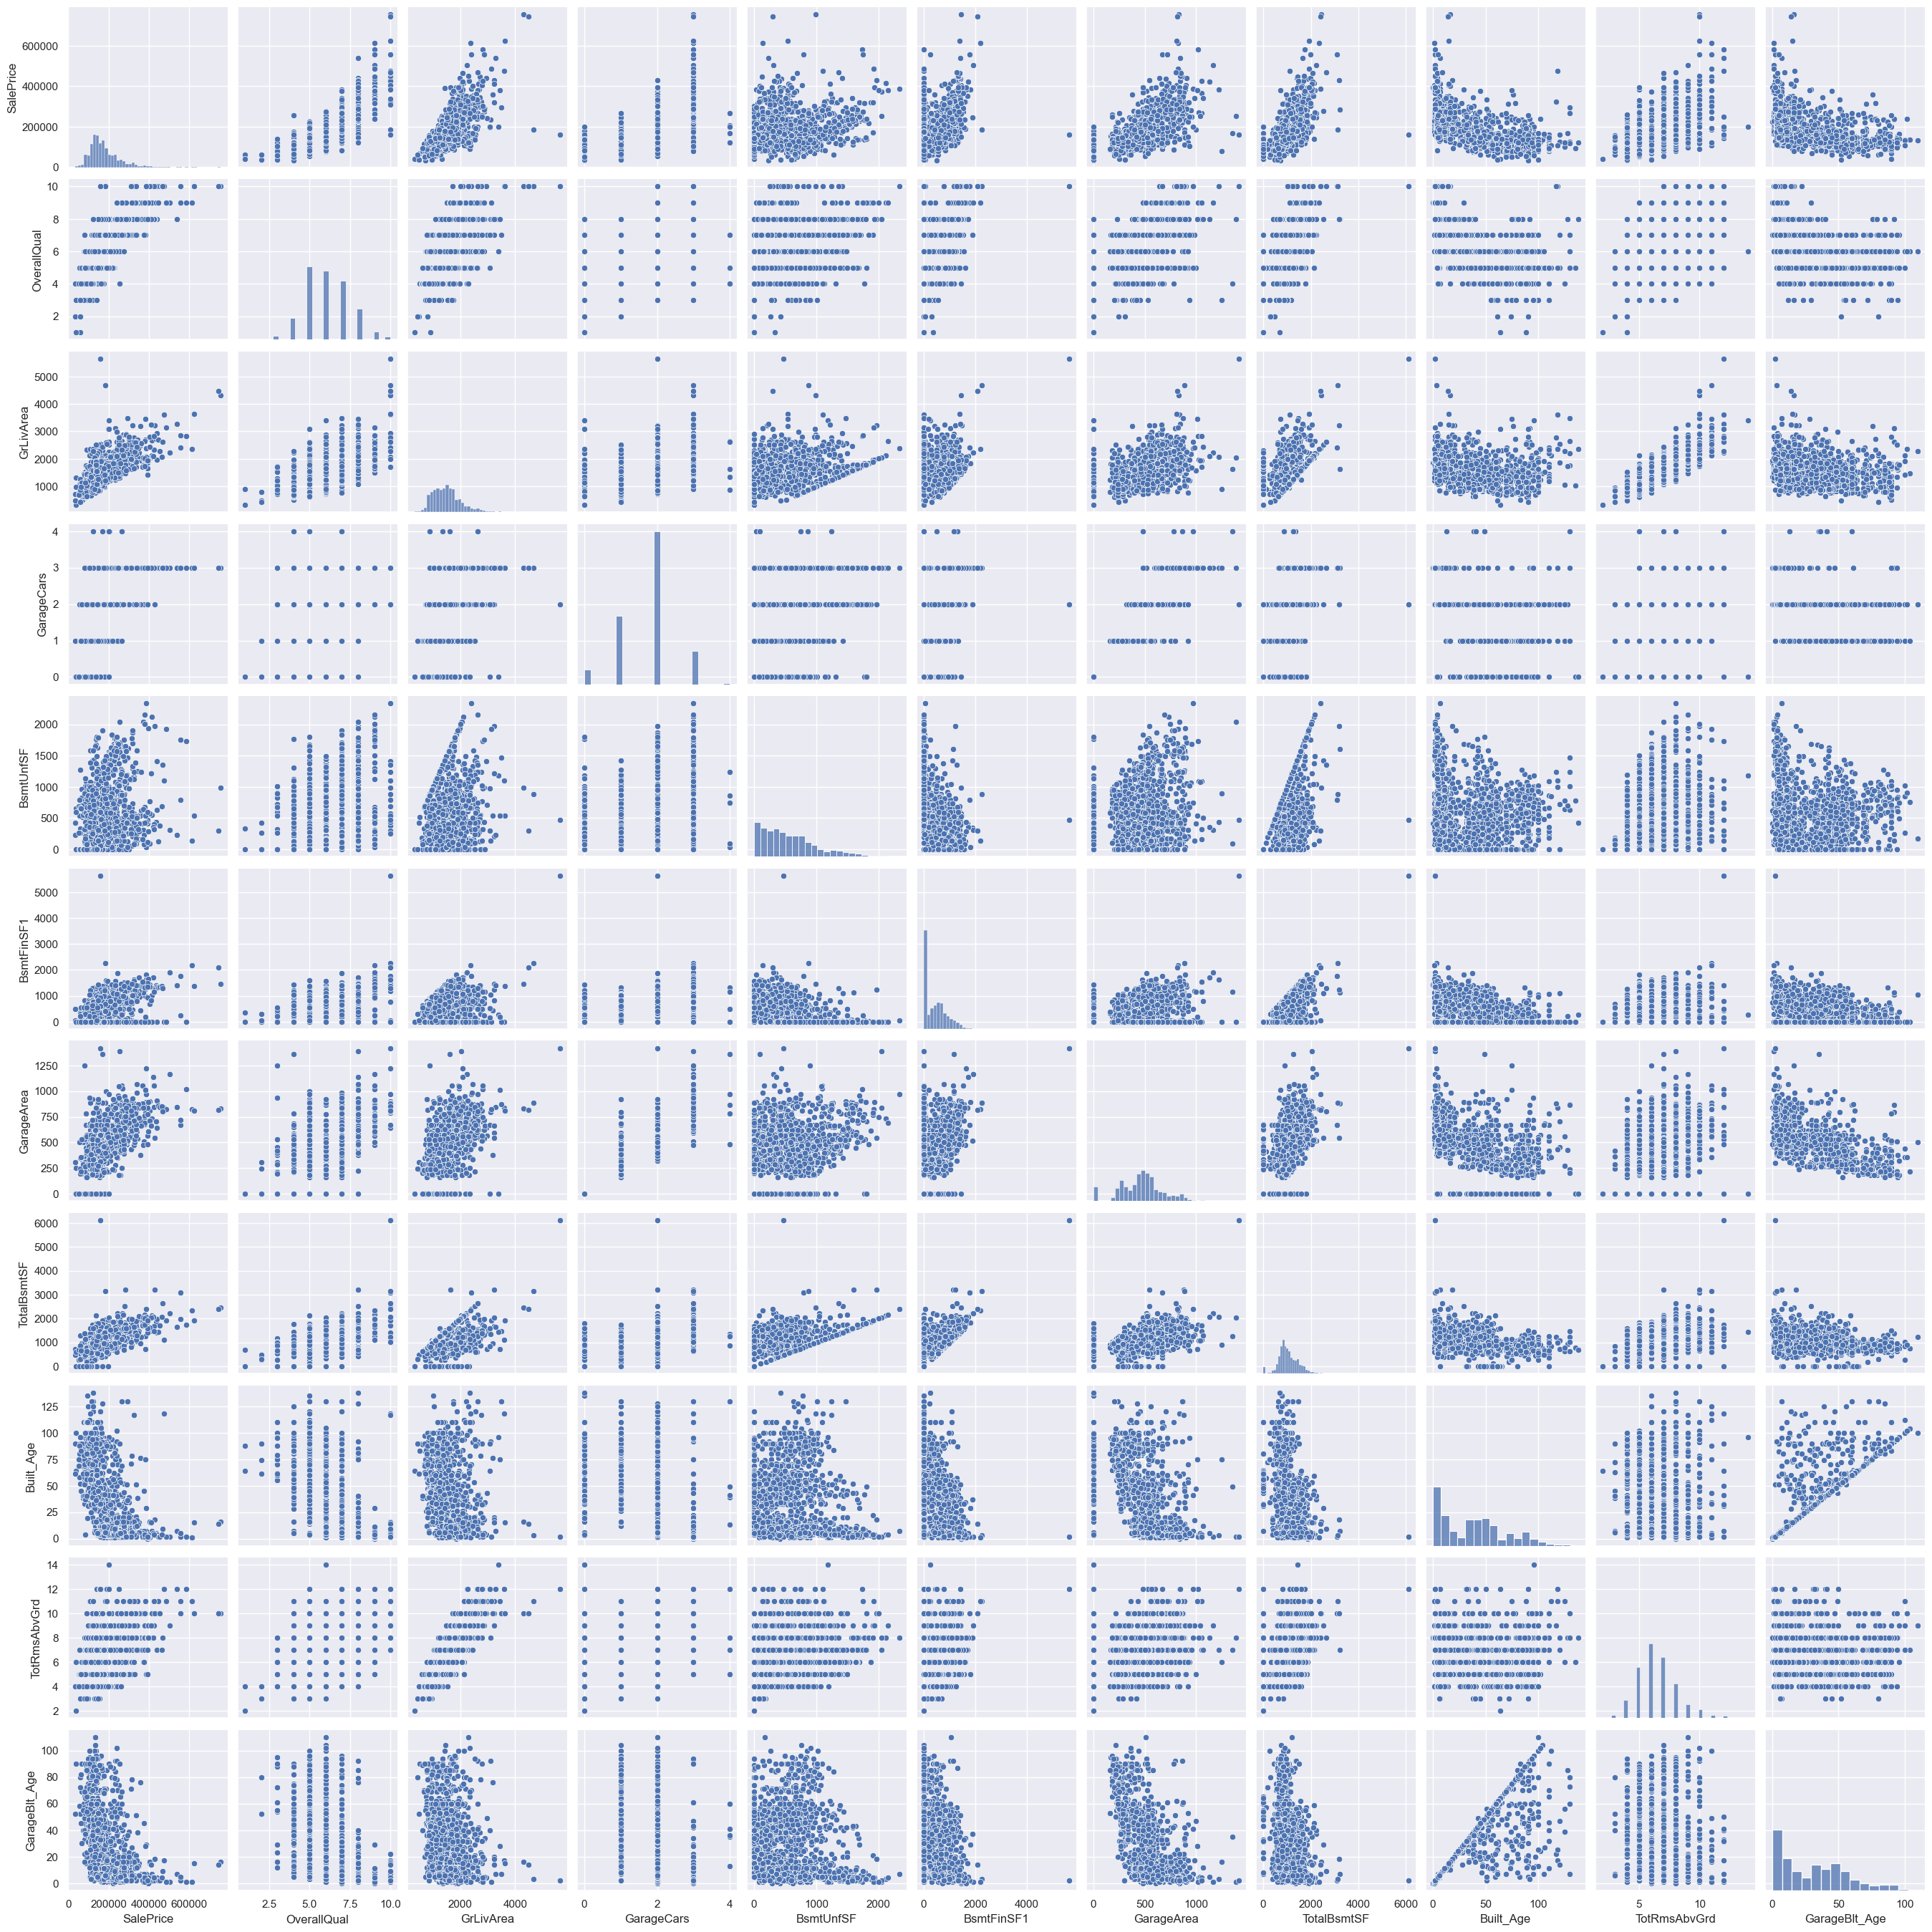

In [235]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'Built_Age', 'TotRmsAbvGrd', 'GarageBlt_Age']
sns.pairplot(house_price[cols], size = 2.5)
plt.show()

Let's drop variables that don't show correlation with Sale Price

In [236]:
house_price.drop(['GarageCars'], axis = 1, inplace=True)
house_price.drop(['BsmtUnfSF'], axis = 1, inplace=True)
house_price.drop(['TotRmsAbvGrd'], axis = 1, inplace=True)
house_price.drop(['GarageBlt_Age'], axis = 1, inplace=True)  

house_price.select_dtypes(exclude=['object']).head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1   
0   1          60     8450            7            5       196.0         706  \
1   2          20     9600            6            8         0.0         978   
2   3          60    11250            7            5       162.0         486   
3   4          70     9550            7            5         0.0         216   
4   5          60    14260            8            5       350.0         655   

   BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea   
0           0          856       856       854             0       1710  \
1           0         1262      1262         0             0       1262   
2           0          920       920       866             0       1786   
3           0          756       961       756             0       1717   
4           0         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr   
0             1             0         2         1             3             1  \
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch   
0           0         548           0           61              0          0  \
1           1         460         298            0              0          0   
2           1         608           0           42              0          0   
3           1         642           0           35            272          0   
4           1         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  Built_Age  RemodAdd_Age   
0            0         0        0       2     208500          7             7  \
1            0         0        0       5     181500         34            34   
2            0         0        0       9     223500          9             8   
3            0         0        0       2     140000         95            40   
4            0         0        0      12     250000         10            10   

   Sold_Age  
0         2  
1         3  
2         2  
3         4  
4         2

### Numeric data further analysis

In [237]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3 - q1
    lo  = q1 - (1.5 * value)
    hi = q3 + (1.5 * value)
    out= x[ (x[y] < hi) & (x[y] > lo) ]
    return out

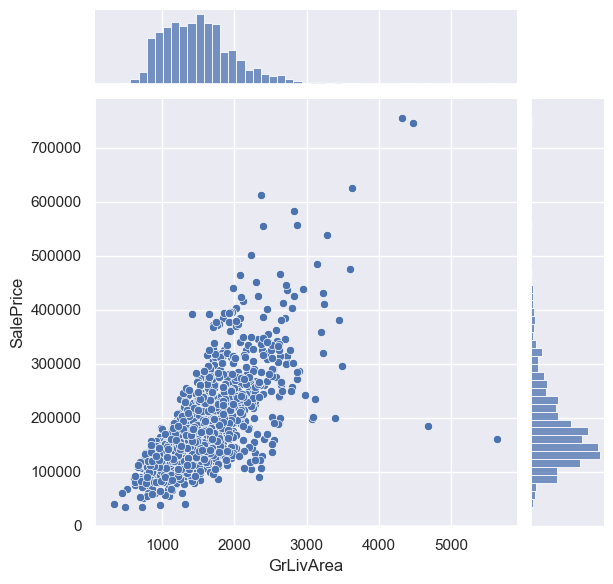

In [238]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=house_price)
plt.show()

Let's remove the outliers present in this

In [239]:
house_price = remove_outliers(house_price,'GrLivArea')

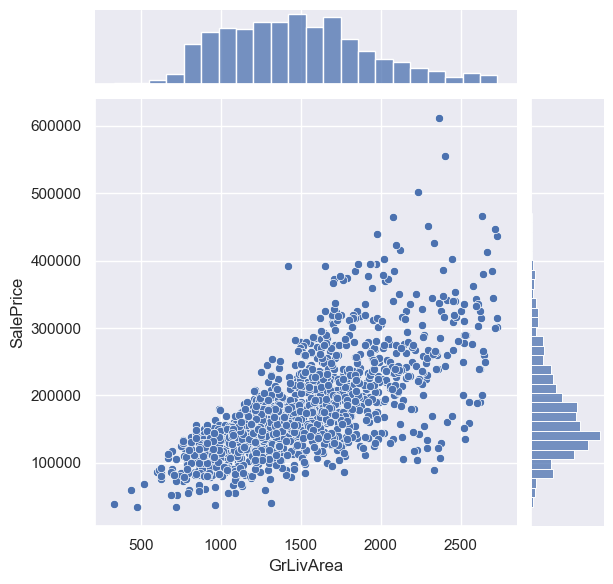

In [240]:
# Let's check how it looks after removal of outliers
sns.jointplot(x='GrLivArea', y='SalePrice', data=house_price)
plt.show()

In [241]:
def show_joint_plots(x_arr, y):
    for x in x_arr:
        sns.jointplot(x=x, y=y, data=house_price)
        plt.show() 

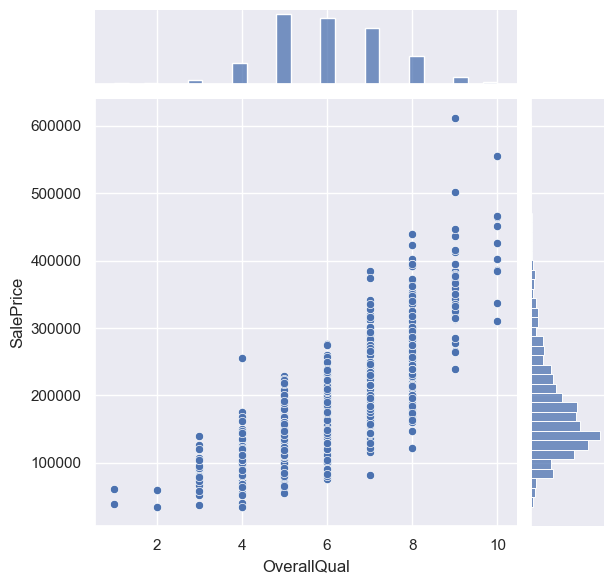

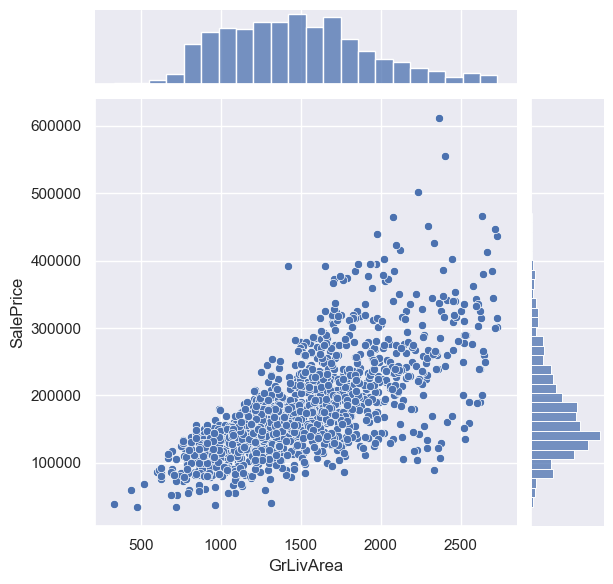

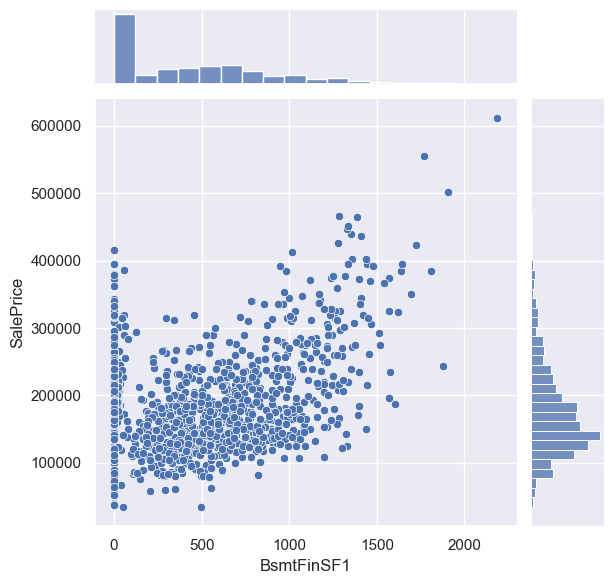

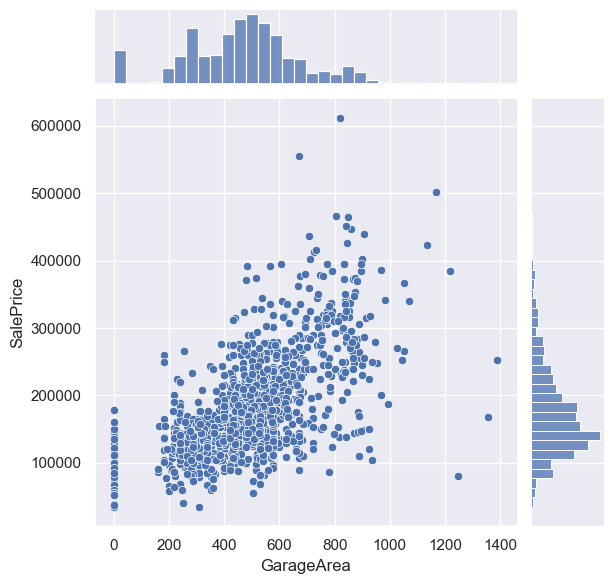

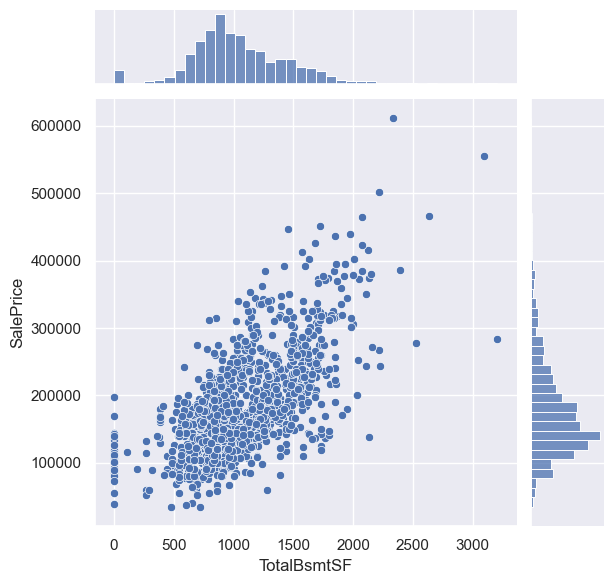

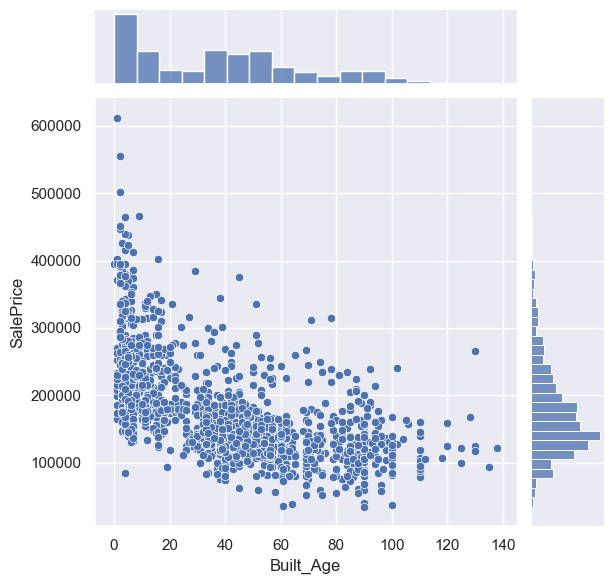

In [242]:
show_joint_plots(['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'Built_Age'], 'SalePrice')

### Inferences:
- More the built age, lesser the sales price
- Price increase with total basement area, garage area, and above grade (ground) living area square feet
- Quality has direct impact on the Sales price

### Data Preparation

In [243]:
# Removing rows with null values
house_price.dropna(inplace=True)
house_price.shape

(1420, 76)

In [244]:
# Let's drop id as it won't be needed for analysis
house_price.drop(['Id'], axis=1, inplace=True)


In [245]:
# Remove columns having single unique value as they can be ignored in this analysis
house_price = house_price[
    [column for column in list(house_price) if house_price[column].nunique() > 1]
]
len(house_price.columns)

75

In [246]:
def create_dummy_variable(df, column):
    dummy_df = pd.get_dummies(df[column], drop_first=True)
    dummy_column_names = []
    for category in dummy_df.columns:
        dummy_column_names.append(str(column)+ '_'+str(category))
    dummy_df.columns = dummy_column_names
    df = pd.concat([df, dummy_df], axis=1)
    df = df.drop(column, axis=1)
    return df, dummy_df

In [247]:
#type of each feature in data: int, float, object
types = house_price.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [248]:
categorical_columns = list(categorical_type.index)
print(categorical_columns)


['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [249]:
houses_price = house_price
dummy_variables =  pd.get_dummies(house_price[categorical_columns], drop_first=True ).apply(lambda x: x.map({True: 1, False: 0}))
houses_price.drop(categorical_columns, axis=1, inplace=True)
houses_price = pd.concat([houses_price, dummy_variables], axis=1)
houses_price.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1   
0          60     8450            7            5       196.0         706  \
1          20     9600            6            8         0.0         978   
2          60    11250            7            5       162.0         486   
3          70     9550            7            5         0.0         216   
4          60    14260            8            5       350.0         655   

   BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea   
0           0          856       856       854             0       1710  \
1           0         1262      1262         0             0       1262   
2           0          920       920       866             0       1786   
3           0          756       961       756             0       1717   
4           0         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr   
0             1             0         2         1             3             1  \
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch   
0           0         548           0           61              0          0  \
1           1         460         298            0              0          0   
2           1         608           0           42              0          0   
3           1         642           0           35            272          0   
4           1         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  Built_Age  RemodAdd_Age   
0            0         0        0       2     208500          7             7  \
1            0         0        0       5     181500         34            34   
2            0         0        0       9     223500          9             8   
3            0         0        0       2     140000         95            40   
4            0         0        0      12     250000         10            10   

   Sold_Age  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave   
0         2            0            0            1            0            1  \
1         3            0            0            1            0            1   
2         2            0            0            1            0            1   
3         4            0            0            1            0            1   
4         2            0            0            1            0            1   

   Alley_Pave  Alley_none  LotShape_IR2  LotShape_IR3  LotShape_Reg   
0           0           1             0             0             1  \
1           0           1             0             0             1   
2           0           1             0             0             0   
3           0           1             0             0             0   
4           0           1             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa   
0                0                0                1                 0  \
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  ...   
0                  0              0              0                 1  ...  \
1                  0              1              0                 0  ...   
2                  0              0              0      

### Model building

##### Creating test train data

In [258]:
X = house_price.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1   
0          60     8450            7            5       196.0         706  \
1          20     9600            6            8         0.0         978   
2          60    11250            7            5       162.0         486   
3          70     9550            7            5         0.0         216   
4          60    14260            8            5       350.0         655   

   BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea   
0           0          856       856       854             0       1710  \
1           0         1262      1262         0             0       1262   
2           0          920       920       866             0       1786   
3           0          756       961       756             0       1717   
4           0         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr   
0             1             0         2         1             3             1  \
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch   
0           0         548           0           61              0          0  \
1           1         460         298            0              0          0   
2           1         608           0           42              0          0   
3           1         642           0           35            272          0   
4           1         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  Built_Age  RemodAdd_Age  Sold_Age  
0            0         0        0       2          7             7         2  
1            0         0        0       5         34            34         3  
2            0         0        0       9          9             8         2  
3            0         0        0       2         95            40         4  
4            0         0        0      12         10            10         2

In [251]:
y = house_price['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [255]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=100)

rfe = rfe.fit(X_train, y_train)

In [256]:
cols = X_train.columns[rfe.support_]

In [257]:
cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Built_Age',
       'RemodAdd_Age', 'Sold_Age'],
      dtype='object')

##### Model training using lasso

In [327]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [328]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha   
0       0.018618      0.006348         0.002749        0.000746       0.0001  \
1       0.014946      0.001552         0.002607        0.000493       0.0010   
2       0.012746      0.001960         0.001951        0.000724       0.0100   
3       0.012446      0.000662         0.002050        0.000525       0.0500   
4       0.012178      0.001131         0.002421        0.000648       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score   
0  {'alpha': 0.0001}           0.872477           0.814642           0.818257  \
1   {'alpha': 0.001}           0.872477           0.814642           0.818257   
2    {'alpha': 0.01}           0.872477           0.814642           0.818257   
3    {'alpha': 0.05}           0.872476           0.814642           0.818257   
4     {'alpha': 0.1}           0.872476           0.814642           0.818257   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score   
0           0.861854           0.897959           0.900465           0.845747  \
1           0.861854           0.897959           0.900465           0.845747   
2           0.861854           0.897959           0.900465           0.845747   
3           0.861854           0.897959           0.900465           0.845747   
4           0.861854           0.897959           0.900465           0.845747   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score   
0           0.848491           0.863776           0.882522         0.860619  \
1           0.848492           0.863776           0.882522         0.860619   
2           0.848492           0.863776           0.882522         0.860619   
3           0.848492           0.863777           0.882522         0.860619   
4           0.848493           0.863778           0.882522         0.860619   

   std_test_score  rank_test_score  split0_train_score  split1_train_score   
0         0.02809               28            0.868118            0.874631  \
1         0.02809               27            0.868118            0.874631   
2         0.02809               26            0.868118            0.874631   
3         0.02809               25            0.868118            0.874631   
4         0.02809               24            0.868118            0.874631   

   split2_train_score  split3_train_score  split4_train_score   
0            0.875036            0.869237            0.865354  \
1            0.875036            0.869237            0.865354   
2            0.875036            0.869237            0.865354   
3            0.875036            0.869237            0.865354   
4            0.875036            0.869237            0.865354   

   split5_train_score  split6_train_score  split7_train_score   
0            0.864527            0.870874            0.870357  \
1            0.864527            0.870874            0.870357   
2            0.864527            0.870874            0.870357   
3            0.864527            0.870874            0.870357   
4            0.864527            0.870874            0.870357   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.868903            0.867002          0.869404         0.003317  
1            0.868903            0.867002          0.869404         0.003317  
2            0.868903            0.867002          0.869404         0.003317  
3            0.868903            0.867002          0.869404         0.003317  
4            0.868903            0.867002          0.869404         0.003317

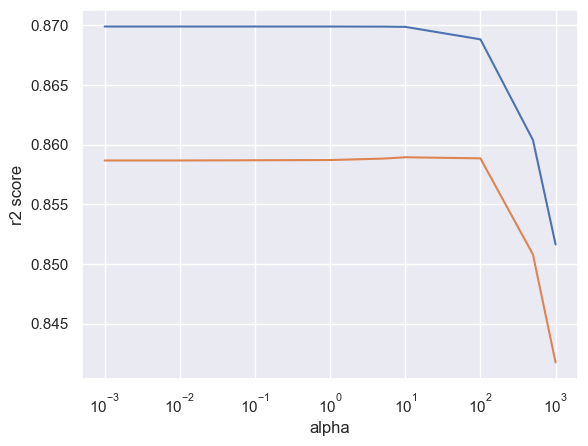

In [329]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [330]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 500}
0.8614768726580506


In [332]:
lasso = Lasso(alpha=500)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8681385572428234
0.8575983876837276


In [333]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
parameters_list = list(zip(cols, model_parameters))

In [334]:
parameters_list = [parameter for parameter in parameters_list if parameter[1] != 0]

In [335]:
parameter_df = pd.DataFrame(parameters_list, columns=['variable', 'factor'])
parameter_df = parameter_df.sort_values(by='factor', ascending=False).set_index('variable')
parameter_df = parameter_df[parameter_df.index != 'constant']
parameter_df

factor
variable                
OverallQual    15701.052
OverallCond     3679.424
Fireplaces      2027.685
BsmtFullBath    1410.058
MoSold           208.065
Sold_Age         205.807
PoolArea          68.542
GrLivArea         39.017
1stFlrSF          26.134
MasVnrArea        26.039
OpenPorchSF       25.125
GarageArea        24.914
2ndFlrSF          22.475
BsmtFinSF1        22.430
3SsnPorch         17.397
WoodDeckSF        16.094
TotalBsmtSF       15.126
EnclosedPorch     11.352
LotArea            0.498
ScreenPorch       -0.407
MiscVal           -0.794
BsmtFinSF2        -1.422
LowQualFinSF      -9.591
MSSubClass      -143.957
RemodAdd_Age    -259.686
Built_Age       -307.826
FullBath        -510.718
HalfBath        -794.630
BsmtHalfBath   -4063.542
KitchenAbvGr   -5150.185
BedroomAbvGr   -7736.686

The values above represent the key indicators for predicting house values. A positive factor suggests that the Sales Price of a house will increase by the factor specified when the variable is incremented by one, while a negative factor implies that the Sales Price will decrease by the specified factor when the variable is increased by one.

#### Creating test train data

In [269]:
y = house_price.loc[:, 'SalePrice']
X = house_price.loc[:, house_price.columns != 'SalePrice']

# scale
scaler = StandardScaler()
scaler.fit(X)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [270]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=100)

rfe = rfe.fit(X_train, y_train)

In [271]:
cols = X_train.columns[rfe.support_]

#### Training model using Ridge

In [320]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [321]:
print(model_cv.best_params_)
print(model_cv.best_score_)


{'alpha': 50}
0.8610387578204772


In [322]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha   
0       0.003783      0.000920         0.002314        0.000936       0.0001  \
1       0.005051      0.001028         0.002588        0.001046       0.0010   
2       0.004092      0.001270         0.001979        0.000704       0.0100   
3       0.003761      0.000771         0.001632        0.000569       0.0500   
4       0.003852      0.000679         0.002100        0.000471       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score   
0  {'alpha': 0.0001}           0.872477           0.814642           0.818257  \
1   {'alpha': 0.001}           0.872477           0.814642           0.818257   
2    {'alpha': 0.01}           0.872477           0.814642           0.818257   
3    {'alpha': 0.05}           0.872475           0.814644           0.818257   
4     {'alpha': 0.1}           0.872472           0.814646           0.818257   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score   
0           0.861854           0.897959           0.900465           0.845747  \
1           0.861854           0.897959           0.900465           0.845747   
2           0.861854           0.897960           0.900465           0.845747   
3           0.861855           0.897961           0.900466           0.845746   
4           0.861856           0.897964           0.900468           0.845746   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score   
0           0.848492           0.863776           0.882522         0.860619  \
1           0.848492           0.863776           0.882522         0.860619   
2           0.848493           0.863777           0.882522         0.860619   
3           0.848497           0.863780           0.882522         0.860620   
4           0.848502           0.863783           0.882521         0.860621   

   std_test_score  rank_test_score  split0_train_score  split1_train_score   
0         0.02809               26            0.868118            0.874631  \
1         0.02809               25            0.868118            0.874631   
2         0.02809               24            0.868118            0.874631   
3         0.02809               23            0.868118            0.874631   
4         0.02809               22            0.868118            0.874631   

   split2_train_score  split3_train_score  split4_train_score   
0            0.875036            0.869237            0.865354  \
1            0.875036            0.869237            0.865354   
2            0.875036            0.869237            0.865354   
3            0.875036            0.869237            0.865354   
4            0.875036            0.869237            0.865354   

   split5_train_score  split6_train_score  split7_train_score   
0            0.864527            0.870874            0.870357  \
1            0.864527            0.870874            0.870357   
2            0.864527            0.870874            0.870357   
3            0.864527            0.870874            0.870357   
4            0.864527            0.870874            0.870357   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.868903            0.867002          0.869404         0.003317  
1            0.868903            0.867002          0.869404         0.003317  
2            0.868903            0.867002          0.869404         0.003317  
3            0.868903            0.867002          0.869404         0.003317  
4            0.868903            0.867002          0.869404         0.003317

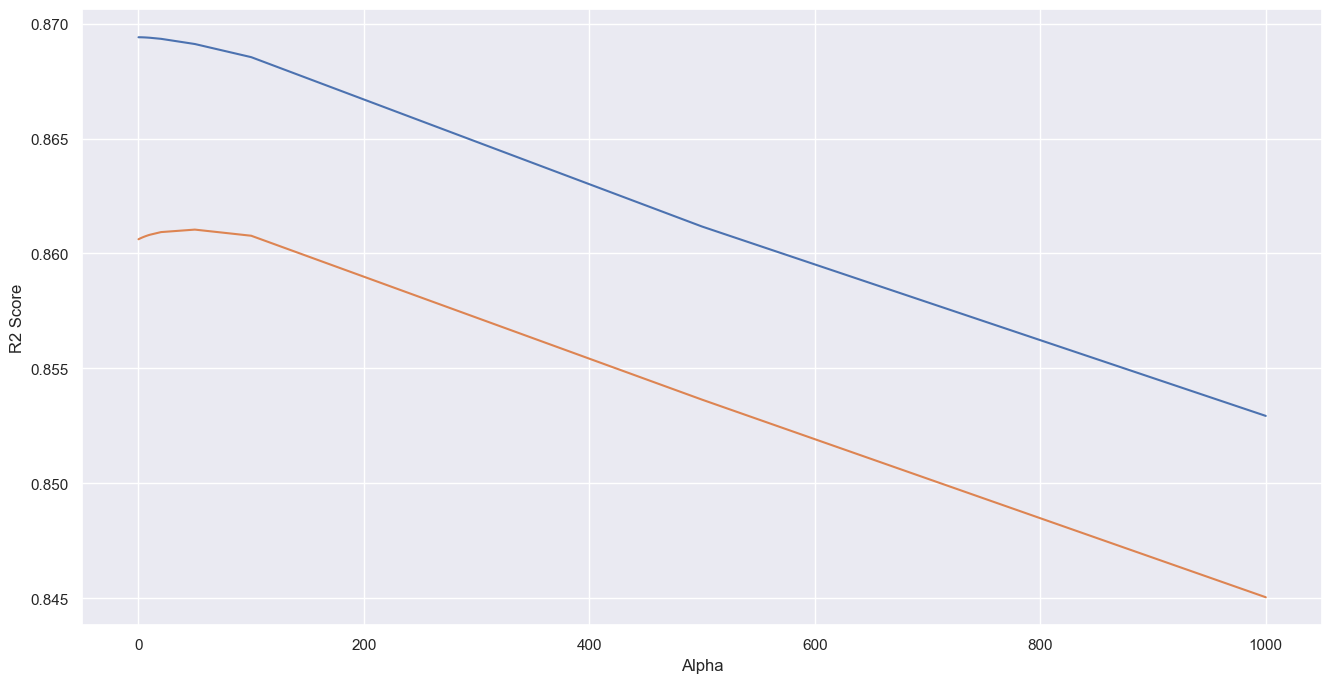

In [323]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [324]:
model_cv.best_params_

{'alpha': 50}

##### Model with optimal alpha

In [325]:
ridge = Ridge(alpha = 50)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8687173984266297
0.8607115596830036


In [326]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 4) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
parameters_list = list(zip(cols, model_parameters))

In [311]:
parameters_list = [parameter for parameter in parameters_list if parameter[1] != 0]

In [312]:
parameter_df = pd.DataFrame(parameters_list, columns=['variable', 'factor'])
parameter_df = parameter_df.sort_values(by='factor', ascending=False).set_index('variable')
parameter_df = parameter_df[parameter_df.index != 'constant']
parameter_df

factor
variable                 
OverallQual    15701.0525
OverallCond     3679.4240
Fireplaces      2027.6853
BsmtFullBath    1410.0579
MoSold           208.0648
Sold_Age         205.8068
PoolArea          68.5424
GrLivArea         39.0174
1stFlrSF          26.1339
MasVnrArea        26.0390
OpenPorchSF       25.1246
GarageArea        24.9144
2ndFlrSF          22.4745
BsmtFinSF1        22.4296
3SsnPorch         17.3966
WoodDeckSF        16.0943
TotalBsmtSF       15.1256
EnclosedPorch     11.3522
LotArea            0.4981
ScreenPorch       -0.4075
MiscVal           -0.7938
BsmtFinSF2        -1.4223
LowQualFinSF      -9.5910
MSSubClass      -143.9566
RemodAdd_Age    -259.6863
Built_Age       -307.8265
FullBath        -510.7183
HalfBath        -794.6304
BsmtHalfBath   -4063.5421
KitchenAbvGr   -5150.1848
BedroomAbvGr   -7736.6858

The values mentioned above represent the primary predictors used to forecast house values. A positive factor indicates that the Sales Price of a house will increase by a certain factor if the corresponding variable is raised by one, while a negative factor suggests that the Sales Price will decrease by a certain factor if the variable is increased by one.

### Conclusion

Company should closely monitor these influential predictors that impact house prices. Higher positive coefficients indicate a stronger potential for increased sale values.

The higher values of negative coeeficients suggest a decrease in sale value.

When the market value of the property is lower than the Predicted Sale Price, its the time to buy.

- Best alpha for lasso: 500

- Best alpha for ridge: 50